# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

### **a) Brute force solution**

In [7]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product1.cpp


In [8]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

2
1
2
2


### **b) Integer Overflow**

In [9]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Writing input1.txt


In [10]:
!./max_pairwise_product1 < input1.txt

1345294336


### **c) Long long fix**

In [11]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product2.cpp


In [12]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000


### **d) Generate random number input file** 

In [2]:
%%writefile gen_ran.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <iostream>
#include <fstream>
using namespace std;

int main () {
  int n = 200000;
  ofstream myfile;
  myfile.open ("stress_case.txt");
  myfile << n << '\n';
  for(int i = 0; i<(n-2); i++){
        myfile << rand() % n << ' ';
  }
  myfile << n << ' ' << n;
  myfile.close();
  return 0;
}

Writing gen_ran.cpp


In [4]:
!g++ gen_ran.cpp -o gen_ran
!./gen_ran

### **e) Time test for previous solution(inefficient)**

In [13]:
!time ./max_pairwise_product2 < stress_case.txt

40000000000

real	2m7.311s
user	2m7.164s
sys	0m0.015s


### **f) Efficient solution**

####C++ Code

In [14]:
%%writefile efficient_pw.cpp
#include <iostream>
#include <vector>
#include <fstream>
using namespace std;

int main () {
    int n;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }
    int index = 1;
    for(int i =2; i<n; i++){
        if(numbers[i]> numbers[index]){
            index = i;
        }
        int temp = numbers[index];
        numbers[index] = numbers[n];
        numbers[n] = temp;
    }
    for(int i =2; i<(n-1); i++){
        if(numbers[i]> numbers[index]){
            index = i;
        }
        int temp = numbers[index];
        numbers[index] = numbers[n-1];
        numbers[n-1] = temp;
    }
    long long ans = (long long)numbers[n]*numbers[n-1];
    cout  << "The the maximum pairwise product is: "<< ans;
}

Writing efficient_pw.cpp


Execution and time

In [15]:
!g++ efficient_pw.cpp -o efficient_pw
!time ./efficient_pw < stress_case.txt

The the maximum pairwise product is: 40000000000
real	0m0.067s
user	0m0.063s
sys	0m0.004s


####Python

In [16]:
def maxpair(numeros):
  indice = 0
  n = len(numeros)-1
  for i in range (1,n):
    if(numeros[i] > numeros[indice]):
      indice = i
  numeros[indice], numeros[n] = numeros[n], numeros[indice]
  indice = 0
  for i in range (1,n):
    if (numeros[i]> numeros[indice]):
       indice = i
  numeros [indice],numeros[n-1] = numeros[n-1], numeros[indice]
  return numeros[n]*numeros[n-1]

with open("stress_case.txt", "r") as file1:
  arr = list(map(int, file1.readlines()[1].split()))

Execution and time

In [17]:
import timeit as tt
start = tt.default_timer()
print( "The the maximum pairwise product is: ", maxpair(arr))
finish = tt.default_timer()
print("Time : ", finish-start, "s")

The the maximum pairwise product is:  40000000000
Time :  0.041711239999926875 s


### **g) No storage solution**

####C++

In [18]:
%%writefile efficient.cpp
#include <iostream>
using namespace std;
int main () {
    int n;
    cin >> n;
    int temp, max1, max2;
    cin >> max1 >> max2;
    for (int i = 2; i < n; ++i) {
        cin >> temp;
        if(temp>max1){
            if(max1>max2)max2=max1;
            max1 = temp;
            continue;
        }
        if(temp>max2)max2=temp;
    }
    long long ans = (long long) max1*max2;
    cout << "The the maximum pairwise product is: "<< ans;
}

Writing efficient.cpp


Execution and time

In [19]:
!g++ efficient.cpp -o efficient
!time ./efficient < stress_case.txt

The the maximum pairwise product is: 40000000000
real	0m0.063s
user	0m0.058s
sys	0m0.004s


####Python

In [36]:
%%writefile efficient.py
import timeit as tt
start = tt.default_timer()

with open("stress_case.txt", "r") as file1:
  arr = list(map(int, file1.readlines()[1].split()))

m1, m2 = 0, 0
for i in range(0,len(arr)):
  if arr[i] > m1:
    if m1>m2:
      m2=m1
    m1=arr[i]
    continue
  if arr[i]>m2:
    m2=arr[i]
finish = tt.default_timer()
print( "The the maximum pairwise product is: ", m1*m2)
print("Time : ", finish-start, "s")

Overwriting efficient.py


In [37]:
!python ./efficient.py

The the maximum pairwise product is:  40000000000
Time :  0.10139670700027636 s


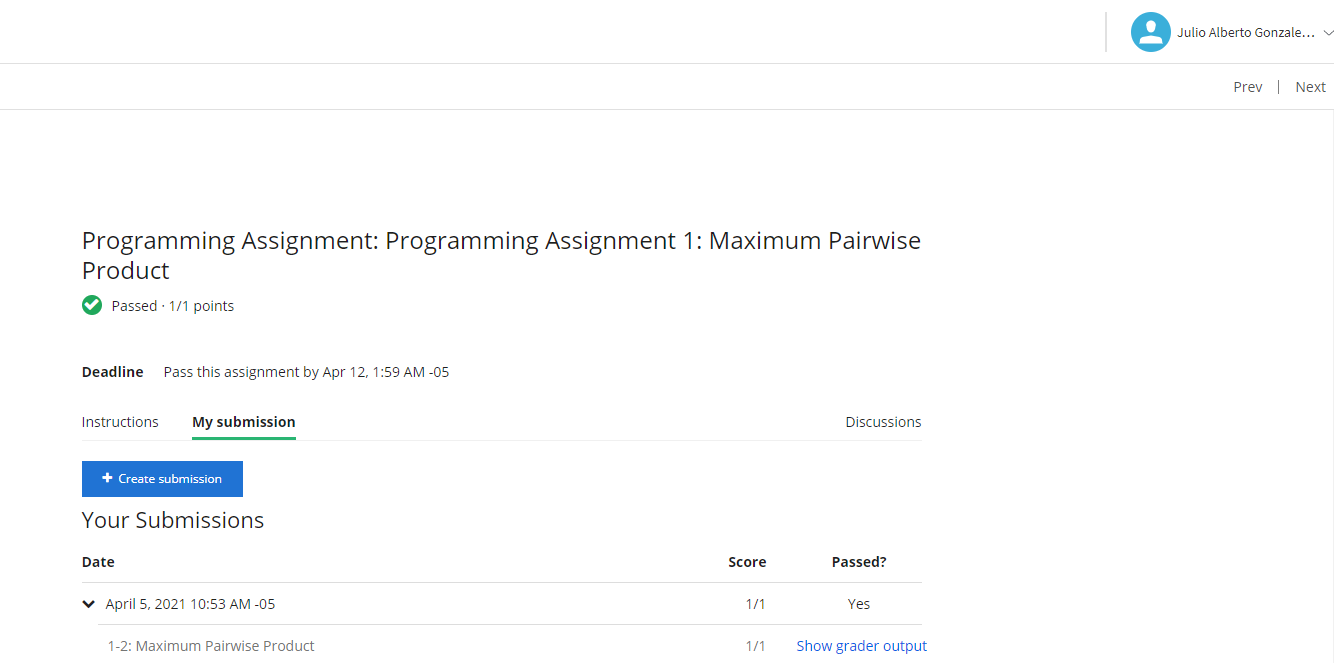